# Bajaj Stock Analysis

In [ ]:
# load libraries/packages
library(tidyr)
library(readr)# read the file
library(ggplot2)# for visualization
library(dplyr)# deploying

# step 1: loading the data

In [ ]:
# dataframe
df <- read_csv("/content/bajaj-2003-2020.csv")


Rows: 4388 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Symbol, Series, Date, No. of Trades
dbl (9): Prev Close, Open Price, High Price, Low Price, Last Price, Close Pr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# look at the data first 5 rows
head(df)


Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAJAUTOFIN,EQ,01-Jan-2003,48.10,49.50,49.50,48.50,49.0,49.00,49.14,3595,176665.00,-
BAJAUTOFIN,EQ,02-Jan-2003,49.00,49.00,49.25,49.00,49.0,49.00,49.04,1975,96852.50,-
BAJAUTOFIN,EQ,03-Jan-2003,49.00,48.00,49.25,48.00,49.1,49.15,48.83,761,37158.75,-
BAJAUTOFIN,EQ,06-Jan-2003,49.15,46.00,48.75,46.00,48.5,48.55,48.27,809,39054.25,-
BAJAUTOFIN,EQ,07-Jan-2003,48.55,47.00,49.25,47.00,49.0,49.00,48.86,1138,55606.50,-
BAJAUTOFIN,EQ,08-Jan-2003,49.00,47.05,49.35,47.05,48.8,49.00,48.96,2659,130175.85,-


In [ ]:
# check for all column names
colnames(df)

[1] "Symbol"                "Series"                "Date"                 
 [4] "Prev Close"            "Open Price"            "High Price"           
 [7] "Low Price"             "Last Price"            "Close Price"          
[10] "Average Price"         "Total Traded Quantity" "Turnover"             
[13] "No. of Trades"

In [ ]:
# describe the data structure :like info
str(df)

spc_tbl_ [4,388 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Symbol               : chr [1:4388] "BAJAUTOFIN" "BAJAUTOFIN" "BAJAUTOFIN" "BAJAUTOFIN" ...
 $ Series               : chr [1:4388] "EQ" "EQ" "EQ" "EQ" ...
 $ Date                 : chr [1:4388] "01-Jan-2003" "02-Jan-2003" "03-Jan-2003" "06-Jan-2003" ...
 $ Prev Close           : num [1:4388] 48.1 49 49 49.1 48.5 ...
 $ Open Price           : num [1:4388] 49.5 49 48 46 47 ...
 $ High Price           : num [1:4388] 49.5 49.2 49.2 48.8 49.2 ...
 $ Low Price            : num [1:4388] 48.5 49 48 46 47 ...
 $ Last Price           : num [1:4388] 49 49 49.1 48.5 49 ...
 $ Close Price          : num [1:4388] 49 49 49.1 48.5 49 ...
 $ Average Price        : num [1:4388] 49.1 49 48.8 48.3 48.9 ...
 $ Total Traded Quantity: num [1:4388] 3595 1975 761 809 1138 ...
 $ Turnover             : num [1:4388] 176665 96852 37159 39054 55606 ...
 $ No. of Trades        : chr [1:4388] "-" "-" "-" "-" ...
 - attr(*, "spec")=
  .. cols(
  ..   Sy

# Summary Statistics :  like describe

In [ ]:
summary(df)

    Symbol             Series              Date             Prev Close     
 Length:4388        Length:4388        Length:4388        Min.   :    1.0  
 Class :character   Class :character   Class :character   1st Qu.:  306.7  
 Mode  :character   Mode  :character   Mode  :character   Median :  705.0  
                                                          Mean   : 1490.4  
                                                          3rd Qu.: 1965.6  
                                                          Max.   :11393.3  
   Open Price        High Price        Low Price       Last Price     
 Min.   :    1.0   Min.   :    1.0   Min.   :    1   Min.   :    1.0  
 1st Qu.:  306.1   1st Qu.:  314.0   1st Qu.:  300   1st Qu.:  306.8  
 Median :  705.0   Median :  716.5   Median :  693   Median :  706.0  
 Mean   : 1492.0   Mean   : 1516.9   Mean   : 1466   Mean   : 1491.9  
 3rd Qu.: 1971.2   3rd Qu.: 2022.3   3rd Qu.: 1928   3rd Qu.: 1965.8  
 Max.   :11300.0   Max.   :11770.0   Max. 

# Step 2 : Data Cleaning

In [ ]:
# Check for null/missing values

colSums(is.na(df))

Symbol                Series                  Date 
                    0                     0                     0 
           Prev Close            Open Price            High Price 
                    0                     0                     0 
            Low Price            Last Price           Close Price 
                    0                     0                     0 
        Average Price Total Traded Quantity              Turnover 
                    0                     0                     0 
        No. of Trades 
                    0

In [ ]:
#Duplicates
sum(duplicated(df))

[1] 0

In [ ]:
# remove duplicates
df <- df %>% distinct()

In [ ]:
# Type Conversion / Data Wrangling of date column to date type format

df$Date <- as.Date(df$Date,format = "%d-%b-%Y")

In [ ]:
#Verify
str(df$Date)

 Date[1:4388], format: "2003-01-01" "2003-01-02" "2003-01-03" "2003-01-06" "2003-01-07" ...


In [ ]:
# Convert Turnover to numeric integer

df$Turnover <- as.numeric(df$Turnover)

In [ ]:
# null values
is.na(df$Turnover)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [ ]:
# verify
str(df$Turnover)

 num [1:4388] 176665 96852 37159 39054 55606 ...


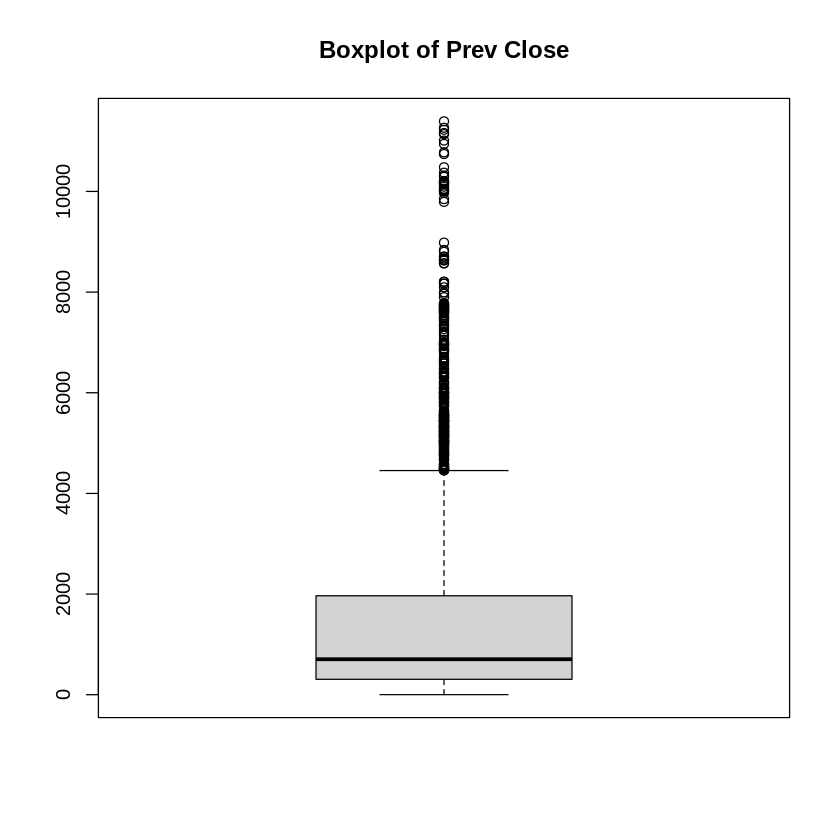

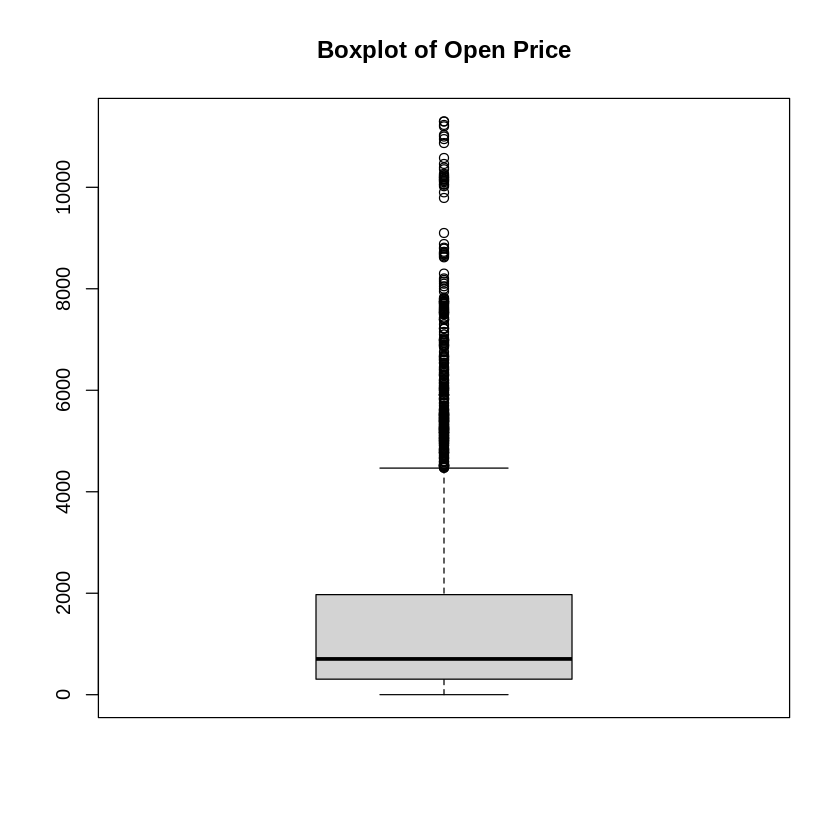

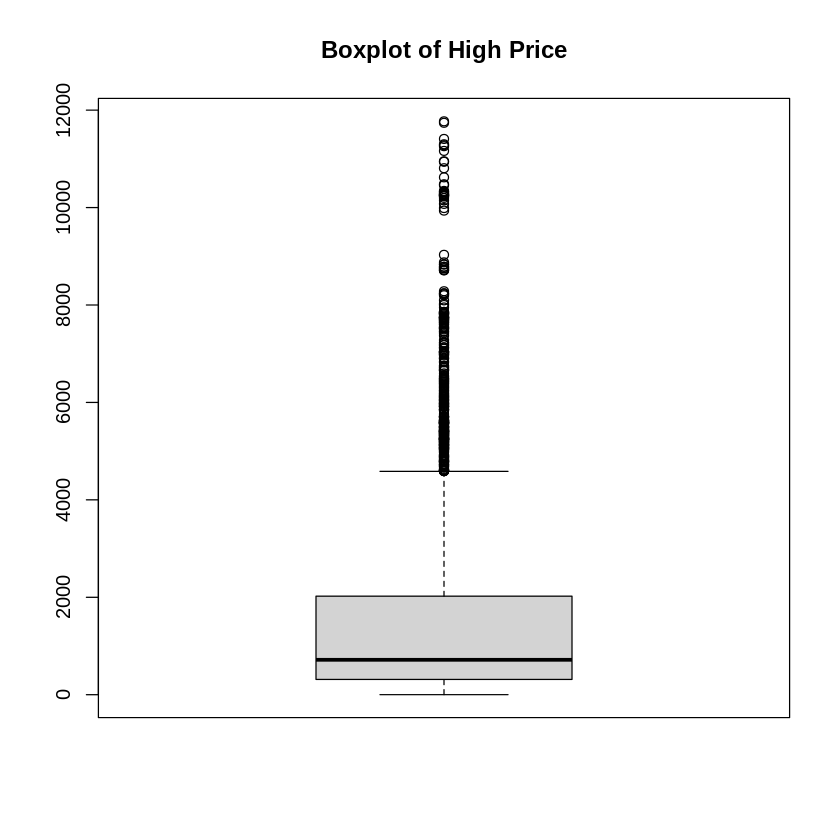

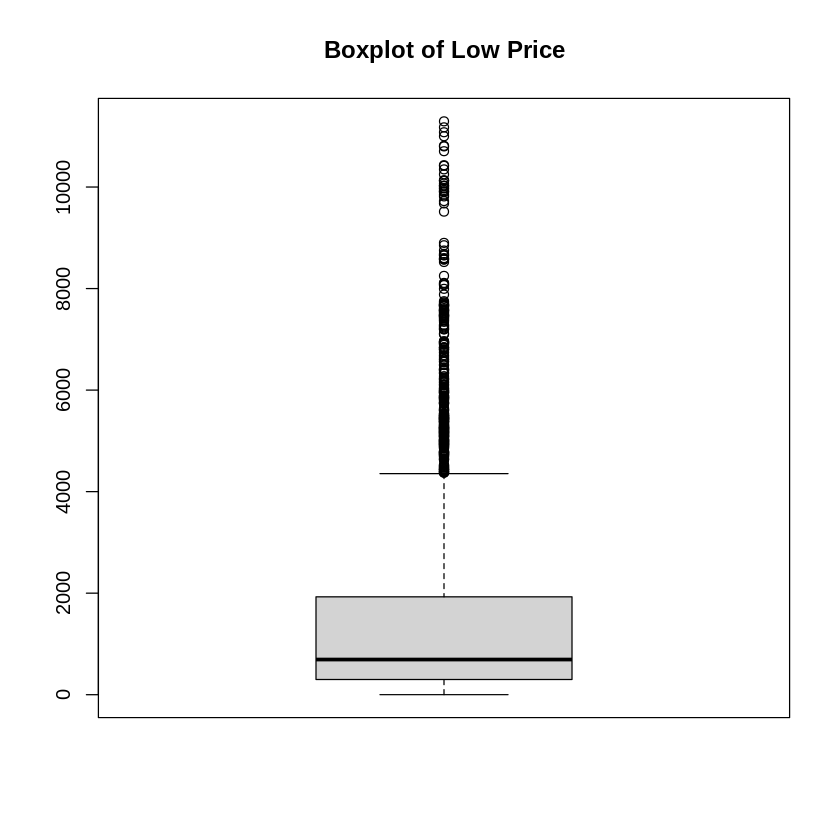

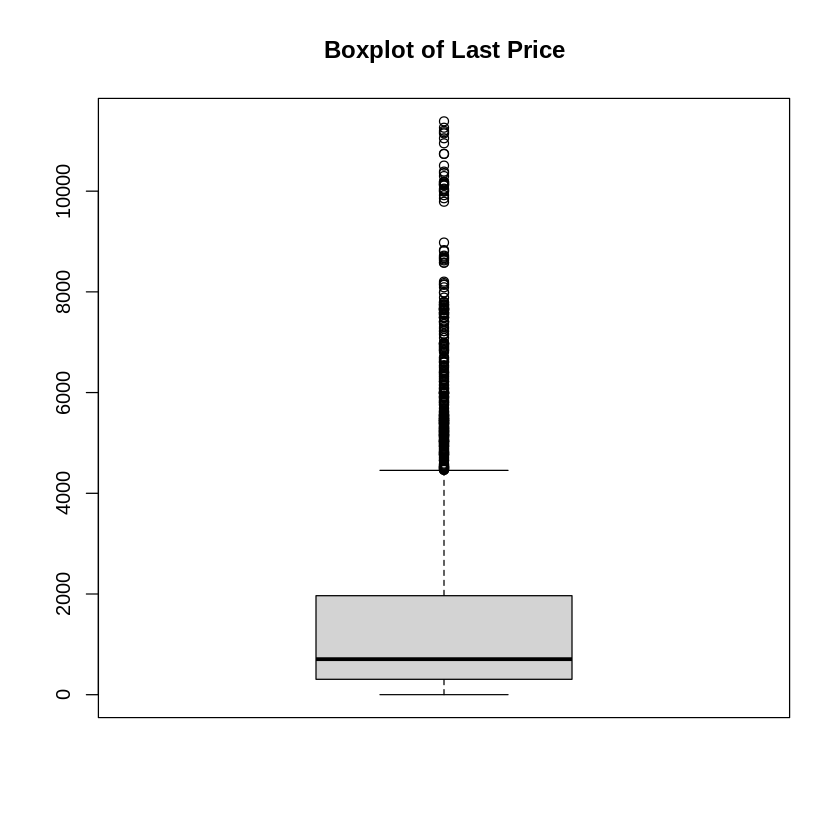

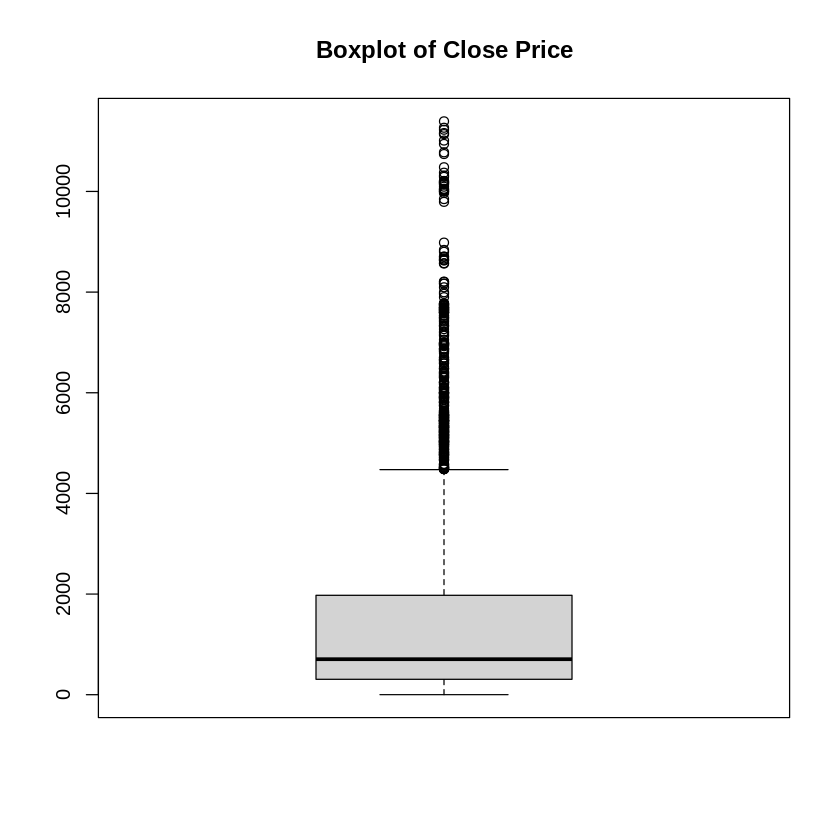

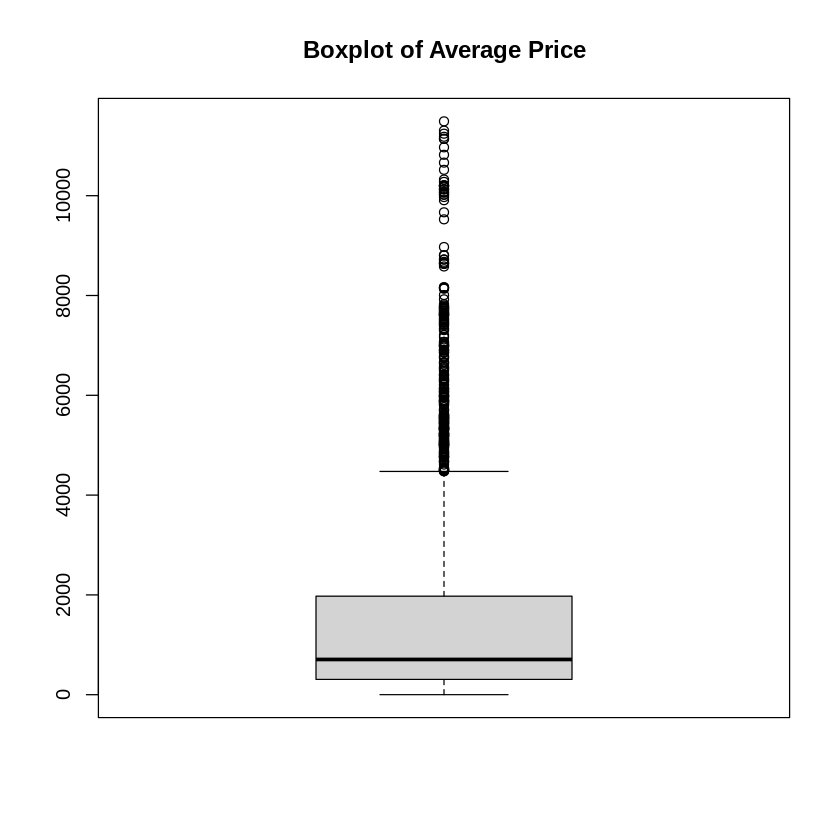

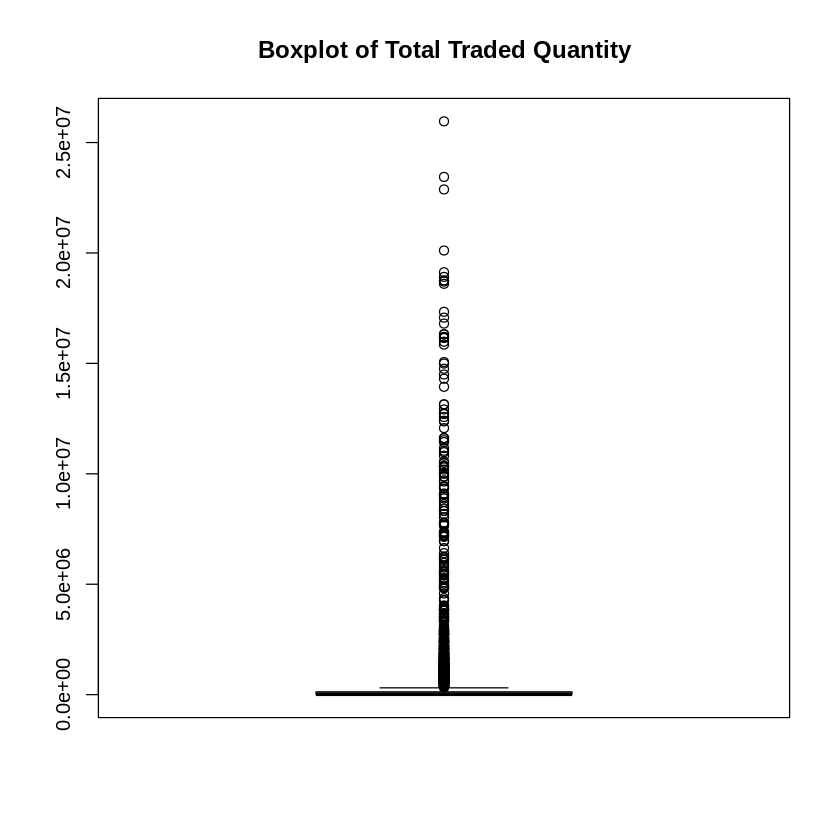

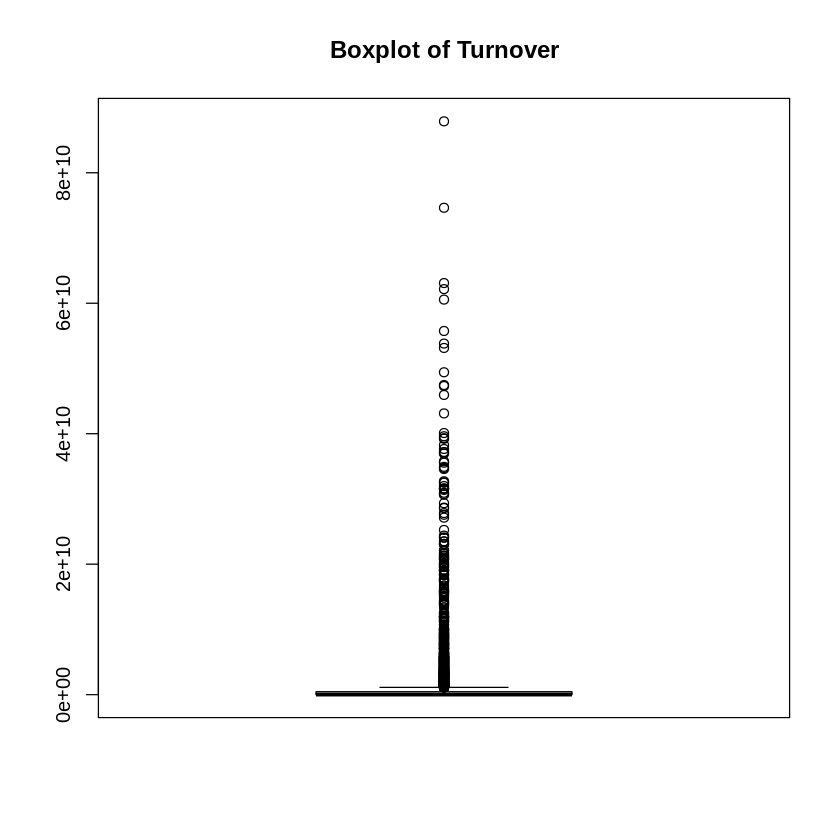

In [ ]:
# outliers
all_columns <- colnames(df)[sapply(df,is.numeric)]

#loop through each column and create boxplot
for(column in all_columns){
boxplot(df[[column]],main = paste("Boxplot of",column))
}

General Observations

Skewness: Most likely, the box plots for 'Open', 'High', 'Low', and 'Close' will exhibit positive skewness (right-skewed). This suggests that the stock prices are generally skewed towards higher values, with occasional extreme high values.
Turnover: The box plot for 'Turnover' might show even more pronounced positive skewness. This is common for trading volume data, where there can be large spikes in trading activity on certain days.
Outliers: You will probably observe outliers in all the numeric columns. This indicates the presence of extreme values in the data, which could be due to various factors like market events, news announcements, or errors in data collection.
Spread: The spread (IQR and whiskers) of the box plots will likely vary across the different columns. 'Turnover' might have a wider spread compared to the price-related columns ('Open', 'High', 'Low', 'Close').
Data Range: By looking at the minimum and maximum values of the whiskers, you can get an idea of the overall range of values for each variable.
Specific Observations (hypothetical)

These are hypothetical observations based on typical stock market data:

Open, High, Low, Close: These variables might have similar distributions with positive skewness and potential outliers on the upper side. The median values for these variables might be relatively close to each other, reflecting the general trend of the stock price.
Turnover: This variable might have a much wider spread and more extreme outliers compared to the price variables. The median turnover might be significantly lower than the maximum value, indicating occasional days with very high trading volume.
Insights for the Bajaj Stock Dataset

Price Volatility: The presence of outliers and positive skewness in the price variables suggests that Bajaj stock prices might be relatively volatile, with periods of significant price increases.
Trading Activity: The box plot for 'Turnover' can provide insights into the trading activity of Bajaj stock. Outliers and a wide spread suggest periods of high trading volume, potentially associated with market events or news announcements.
Potential for Returns: The positive skewness in price variables might indicate opportunities for higher returns, but it also implies a higher risk due to potential price fluctuations.

In [ ]:
#Get all numeric column names
numeric_columns <- colnames(df)[sapply(df,is.numeric)]

# identify thr outliers using IQR method

identify_outliers_iqr <- function(data, column_name) {
  # Calculate quantiles
  Q1 <- quantile(data[[column_name]], 0.25)
  Q3 <- quantile(data[[column_name]], 0.75)
  IQR <- Q3 - Q1

  # Calculate upper and lower bounds
  upper_bound <- Q3 + 1.5 * IQR
  lower_bound <- Q1 - 1.5 * IQR

  # Identify outliers
  outliers <- data %>%
    filter(!!sym(column_name) > upper_bound | !!sym(column_name) < lower_bound)

  return(outliers)
}

In [ ]:
# check for one column with -

  df$'No. of Trades'

[1] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
   [9] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [17] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [25] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [33] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [41] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [49] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [57] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [65] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [73] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [81] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [89] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
  [97] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [105] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [113] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [121] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [129] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [137] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [145] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [153] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [161] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [169] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [177] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [185] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [193] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [201] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [209] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [217] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [225] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [233] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [241] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [249] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [257] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [265] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [273] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [281] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [289] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [297] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [305] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [313] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [321] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [329] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [337] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [345] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [353] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [361] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [369] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [377] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [385] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [393] "-"      "-"      "-"      "-"      "-"      "-"      "-"      "-"     
 [401] "-"      "-"      "-"      "-"      "-"      "

In [ ]:
df$'No.of Trades' <- as.numeric(df$'No. of Trades')

Warning message:
“NAs introduced by coercion”


In [ ]:
  table(df$'No. of Trades')


     -      1   1002   1004   1005  10065   1008 100939  10095 101049   1011 
  2122      1      1      2      1      1      2      1      1      1      2 
  1013   1014   1017 102172 102281  10291 103050 103069 103244   1033 103475 
     1      1      1      1      1      1      1      1      1      1      1 
 10353  10359 103666  10388   1039    104 104180  10427 104287 104324  10435 
     1      1      1      1      1      1      1      1      1      1      1 
 10439  10448   1045 104667  10482  10490 105069   1054 105478 105489   1057 
     1      1      1      1      1      1      1      1      1      1      1 
  1058   1059 105919  10600  10609   1062  10625   1063   1064   1065  10664 
     1      1      1      1      1      1      1      1      1      1      1 
  1067 106879   1069  10691  10703 107114 107167 107550  10767   1077   1079 
     1      1      1      1      1      1      1      1      1      1      1 
108019  10807  10812   1084  10845   1085   1086   1087 108824 

In [ ]:
sum(is.na(df$'No. of Trades'))

[1] 0

In [ ]:
# calculate the mean and median
mean_trades <- mean(df$'No. of Trades',na.rm=TRUE)
median_trades <- median(df$'No. of Trades',na.rm=TRUE)

Warning message in mean.default(df$"No. of Trades", na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”


In [ ]:
print(mean_trades)
print(median_trades)

[1] NA
[1] NA


In [ ]:
# replacing NA with median

df$'No. of Trades'[is.na(df$'No. of Trades')]<- median_trades

In [ ]:
summary(df$'No. of Trades')

   Length     Class      Mode 
     4388 character character 

In [ ]:
library(ggplot2)

In [ ]:
#Histogram
ggplot(df,aes(x='Open Price')) + geom_histogram(bins=30)

Warning message in geom_histogram(bins = 30):
“All aesthetics have length 1, but the data has 4388 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic.
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(e

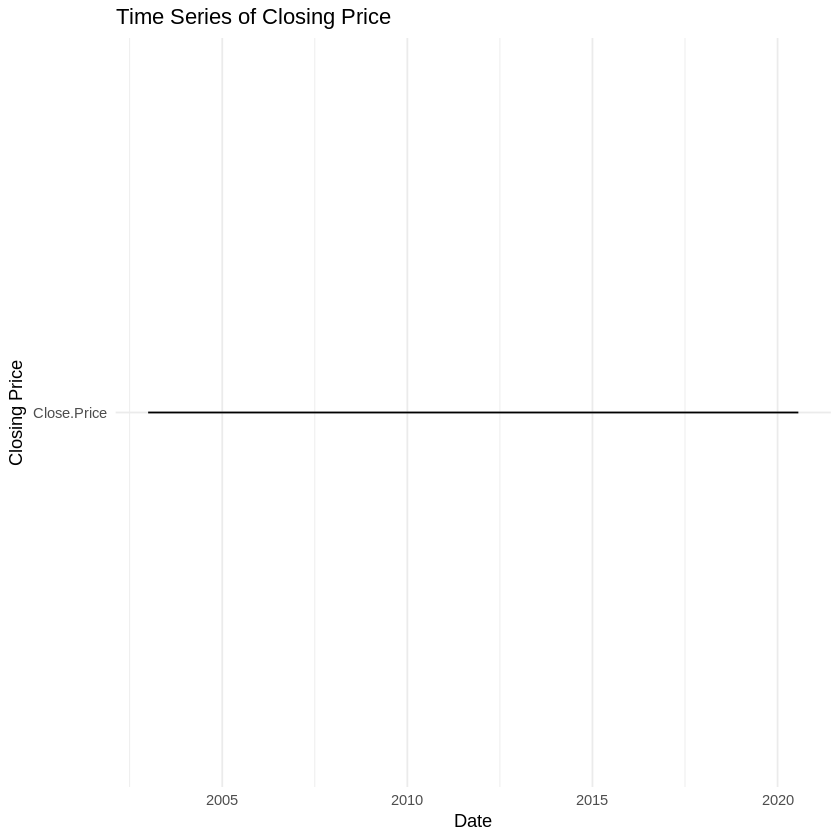

In [ ]:
# Time series analysis using line plots
ggplot(df, aes(x = Date, y = 'Close.Price')) +  # Correct y-axis aesthetic
  geom_line(color = "black") +
  theme_minimal() +
  labs(title = "Time Series of Closing Price",  # More appropriate title
       x = "Date",
       y = "Closing Price")  # Axis labels for clarity